## Predicting Anomalies in Network Traffic (A Binary Classification problem)

### 1. Introduction

#### 1.1 IntrusionsDetection Systems

Intrusion Detection Systems (IDS) provide network security software applications by continuously monitoring network traffic and classifying the connections as normal or malicious. IDS are categorized into two types based on the responsive nature - Passive IDS and Active IDS. A passive IDS is designed to identify and block the malicious and malware attacks manually by human experts whereas active IDS is designed to identify and block the malware attacks using a software automatically. 

IDS are also categorized into Signature based IDS and Anomaly Based IDS. In the Signature based IDS, there exists a database which contains details about all known malware attacks against which each network traffic connection is validated to identify the malicious nature if it exists. This type of IDS is costly and has to keep updating new types of attacks frequently. Anomaly based IDS is a behavior-based system where any deviation from the normal network traffic patterns will be reported using pattern-recognition techniques. In this research paper, a proof-of-concept for a machine learning based Anomaly based intrusion detection will be evaluated on a benchmark intrusion detection dataset. 


#### 1.2 Motivation

The Internet of Things (IoT) has changed the way devices communicate across a network. There are over 30 billion devices connected to each other in today's world where their communication happens over the network. Due to the variety, velocity and vast nature of this traffic, the traditional intrusion detection systems are not sufficient to identify the malware patterns. With the help of data science, machine learning and neural network techniques, one can leverage the historic network traffic patterns and can build an intelligent artificial intelligence model to solve this intrusion detection problem. This project exactly tries to provide a proof-of-concept for this problem by applying machine learning and neural network techniques on a benchmark network intrusion detection dataset.

#### 1.3 Problem Statement

In this research, KDD Cup 1999 dataset will be used to build a machine learning based intrusion detection problem to predict (classify) whether a network connection is "normal" or "abnormal". As this is a categorical prediction, this is a binary classification problem

### 2. DataSet Description and Exploration

In this research, the KDD Cup 1999 dataset has been chosen for the data analysis and model building. This dataset was used in the fifth international conference for the data mining and knowledge discovery competition and contains a huge variety of network intrusion data that is simulated in an environment equipped with a military network setting.

The original source of the dataset is from the official KDD website [1] and can also be found in the kaggle website [2]. The dataset contains about 494,000 records of network readings with details like source bytes, destination connection information, type of attacks and so on. Below are the list of features (columns) and their data types in the dataset.


#### 2.1 Categorical Columns

'protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login'

In [107]:
catg_cols = ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login']

#### 2.2 Continuous Columns

In [108]:
cont_cols = [ 'duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

#### 2.3 Target Variable

The target variable "label" contains all different types of malware attacks and also the value "normal" (i.e., not an attack) as shown below.

'normal', 'buffer_overflow', 'loadmodule', 'perl', 'neptune', 'smurf', 'guess_passwd', 'pod', 'teardrop', 'portsweep', 'ipsweep', 'land', 'ftp_write', 'back', 'imap', 'satan', 'phf', 'nmap', 'multihop', 'warezmaster', 'warezclient', 'spy', 'rootkit'

All malware attacks are grouped (transformed) to the value "abnormal" to make this problem a binary classification problem instead of a multi-class classification.


In [109]:
target_variable = 'label'

#### 2.4 Data Load

In [110]:
import pandas as pd
df = pd.read_csv("../datasets/kddcup99_csv.csv")

#### 2.5 Dataset size

In [111]:
df.shape

(494020, 42)

494020 records with 41 features and 1 target variable ("label") for prediction

In [112]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


#### 2.6 Target Variable distribution

In [113]:
df['label'].value_counts()

smurf              280790
neptune            107201
normal              97277
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: label, dtype: int64

As seen above, there are various type of malware attacks which can be grouped as "abnormal" to make this problem as binary classification problem

##### 2.6.1 Group all malware attacks as "abnormal"

In [114]:
attack_types = list(df['label'].unique())
attack_types.remove('normal') # remove normal from attack types as we only want malware attacks to convert as abnormal

In [115]:
df['label'] = df['label'].replace(attack_types, 'abnormal')
df.shape

(494020, 42)

In [116]:
df['label'].value_counts()

abnormal    396743
normal       97277
Name: label, dtype: int64

##### 2.6.2 Target Variable histogram distribution

Text(0.5, 1.0, 'Target Classes Distribution')

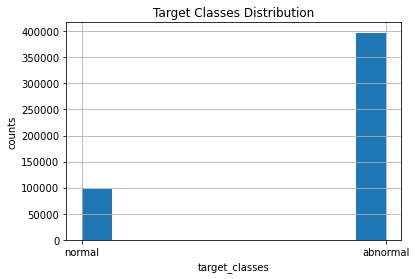

In [127]:
label_hist_plot = df['label'].hist()
label_hist_plot.set_xlabel('target_classes')
label_hist_plot.set_ylabel('counts')
label_hist_plot.set_title('Target Classes Distribution')

#### 2.7 Categorical Variables Distribution

In [130]:
catg_cols

['protocol_type',
 'service',
 'flag',
 'land',
 'logged_in',
 'is_host_login',
 'is_guest_login']

In [133]:
df[catg_cols].dtypes

protocol_type     object
service           object
flag              object
land               int64
logged_in          int64
is_host_login      int64
is_guest_login     int64
dtype: object

As seen from the above datatypes of the categorical columns,the column values are not strings. We need to convert them to string before performing any analysis

##### 2.7.1 Fixing the data types of categorical columns

In [137]:
df['protocol_type'] = df['protocol_type'].astype(str)
df['service'] = df['service'].astype(str)
df['flag'] = df['flag'].astype(str)
df['land'] = df['land'].astype(str)
df['logged_in'] = df['logged_in'].astype(str)
df['is_host_login'] = df['is_host_login'].astype(str)
df['is_guest_login'] = df['is_guest_login'].astype(str)
df[catg_cols].dtypes

protocol_type     object
service           object
flag              object
land              object
logged_in         object
is_host_login     object
is_guest_login    object
dtype: object

##### 2.7.2 Distribution Plots for categorical variables

In [138]:
df[catg_cols].describe()

,protocol_type,service,flag,land,logged_in,is_host_login,is_guest_login
count,494020,494020,494020,494020,494020,494020,494020
unique,3,66,11,2,2,1,2
top,icmp,ecr_i,SF,0,0,0,0
freq,283602,281400,378439,493998,420784,494020,493335


###### 2.7.2.1 protocol_type distribution

Text(0.5, 1.0, 'protocol_type distribution')

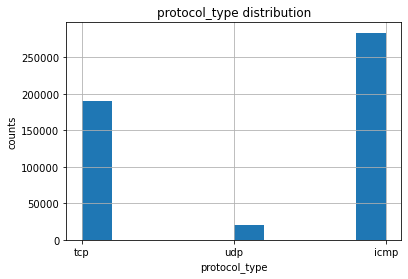

In [139]:
protocol_type_hist_plot = df['protocol_type'].hist()
protocol_type_hist_plot.set_xlabel('protocol_type')
protocol_type_hist_plot.set_ylabel('counts')
protocol_type_hist_plot.set_title('protocol_type distribution')

###### 2.7.2.2 service distribution

In [151]:
df['service'].value_counts()

ecr_i      281400
private    110893
http        64292
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
tftp_u          1
red_i           1
pm_dump         1
Name: service, Length: 66, dtype: int64

In [153]:
print(list(df['service'].unique())) # possible values for the column service

['http', 'smtp', 'finger', 'domain_u', 'auth', 'telnet', 'ftp', 'eco_i', 'ntp_u', 'ecr_i', 'other', 'private', 'pop_3', 'ftp_data', 'rje', 'time', 'mtp', 'link', 'remote_job', 'gopher', 'ssh', 'name', 'whois', 'domain', 'login', 'imap4', 'daytime', 'ctf', 'nntp', 'shell', 'IRC', 'nnsp', 'http_443', 'exec', 'printer', 'efs', 'courier', 'uucp', 'klogin', 'kshell', 'echo', 'discard', 'systat', 'supdup', 'iso_tsap', 'hostnames', 'csnet_ns', 'pop_2', 'sunrpc', 'uucp_path', 'netbios_ns', 'netbios_ssn', 'netbios_dgm', 'sql_net', 'vmnet', 'bgp', 'Z39_50', 'ldap', 'netstat', 'urh_i', 'X11', 'urp_i', 'pm_dump', 'tftp_u', 'tim_i', 'red_i']


##### 2.7.2.3 flag distribution

Text(0.5, 1.0, 'flag distribution')

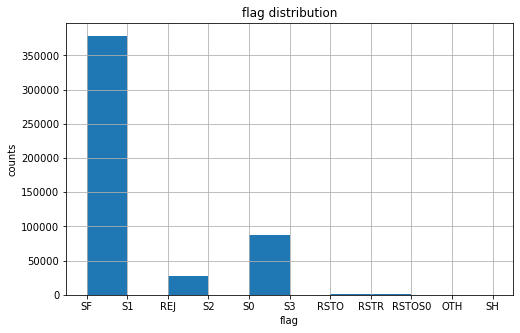

In [157]:
flag_hist_plot = df['flag'].hist(figsize=(8,5))
flag_hist_plot.set_xlabel('flag')
flag_hist_plot.set_ylabel('counts')
flag_hist_plot.set_title('flag distribution')

##### 2.7.2.4 land distribution

Text(0.5, 1.0, 'flag distribution')

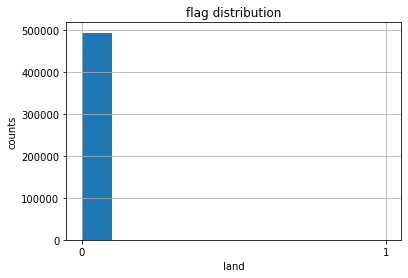

In [159]:
land_hist_plot = df['land'].hist()
land_hist_plot.set_xlabel('land')
land_hist_plot.set_ylabel('counts')
land_hist_plot.set_title('flag distribution')

###### 2.7.2.5 logged_in

Text(0.5, 1.0, 'logged_in distribution')

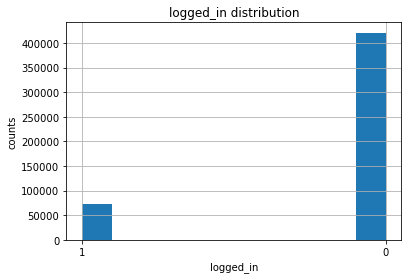

In [160]:
logged_in_hist_plot = df['logged_in'].hist()
logged_in_hist_plot.set_xlabel('logged_in')
logged_in_hist_plot.set_ylabel('counts')
logged_in_hist_plot.set_title('logged_in distribution')

##### 2.7.2.6 is_guest_login

Text(0.5, 1.0, 'is_guest_login distribution')

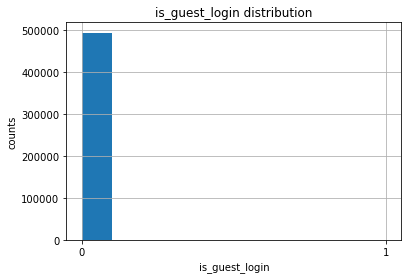

In [161]:
is_guest_login_hist_plot = df['is_guest_login'].hist()
is_guest_login_hist_plot.set_xlabel('is_guest_login')
is_guest_login_hist_plot.set_ylabel('counts')
is_guest_login_hist_plot.set_title('is_guest_login distribution')

###### 2.7.2.7 is_host_login

Text(0.5, 1.0, 'is_host_login distribution')

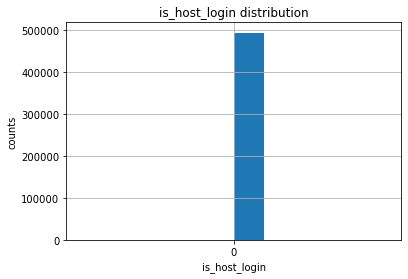

In [162]:
is_host_login_hist_plot = df['is_host_login'].hist()
is_host_login_hist_plot.set_xlabel('is_host_login')
is_host_login_hist_plot.set_ylabel('counts')
is_host_login_hist_plot.set_title('is_host_login distribution')

In [164]:
df['is_host_login'].value_counts() # this value can be dropped as all values are same and may not affect the model

0    494020
Name: is_host_login, dtype: int64

##### 2.6 Continous Variables Distribution

In [171]:
df[cont_cols].dtypes # verify if all dtypes are either float or int, otherwise fix them

duration                         int64
src_bytes                        int64
dst_bytes                        int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate                float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count                   int64
dst_host_srv_count       

In [172]:
df[cont_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
duration,494020.0,47.979400,707.747185,0.0,0.00,0.0,0.00,58329.0
src_bytes,494020.0,3025.615744,988219.101230,0.0,45.00,520.0,1032.00,693375640.0
dst_bytes,494020.0,868.530774,33040.034672,0.0,0.00,0.0,0.00,5155468.0
wrong_fragment,494020.0,0.006433,0.134805,0.0,0.00,0.0,0.00,3.0
urgent,494020.0,0.000014,0.005510,0.0,0.00,0.0,0.00,3.0
hot,494020.0,0.034519,0.782103,0.0,0.00,0.0,0.00,30.0
num_failed_logins,494020.0,0.000152,0.015520,0.0,0.00,0.0,0.00,5.0
num_compromised,494020.0,0.010212,1.798328,0.0,0.00,0.0,0.00,884.0
root_shell,494020.0,0.000111,0.010551,0.0,0.00,0.0,0.00,1.0
su_attempted,494020.0,0.000036,0.007793,0.0,0.00,0.0,0.00,2.0


array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'src_bytes'}>,
        <AxesSubplot:title={'center':'dst_bytes'}>,
        <AxesSubplot:title={'center':'wrong_fragment'}>,
        <AxesSubplot:title={'center':'urgent'}>,
        <AxesSubplot:title={'center':'hot'}>],
       [<AxesSubplot:title={'center':'num_failed_logins'}>,
        <AxesSubplot:title={'center':'num_compromised'}>,
        <AxesSubplot:title={'center':'root_shell'}>,
        <AxesSubplot:title={'center':'su_attempted'}>,
        <AxesSubplot:title={'center':'num_root'}>,
        <AxesSubplot:title={'center':'num_file_creations'}>],
       [<AxesSubplot:title={'center':'num_shells'}>,
        <AxesSubplot:title={'center':'num_access_files'}>,
        <AxesSubplot:title={'center':'num_outbound_cmds'}>,
        <AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'srv_count'}>,
        <AxesSubplot:title={'center':'serror_rate'}>],
       [<AxesSubplot:title

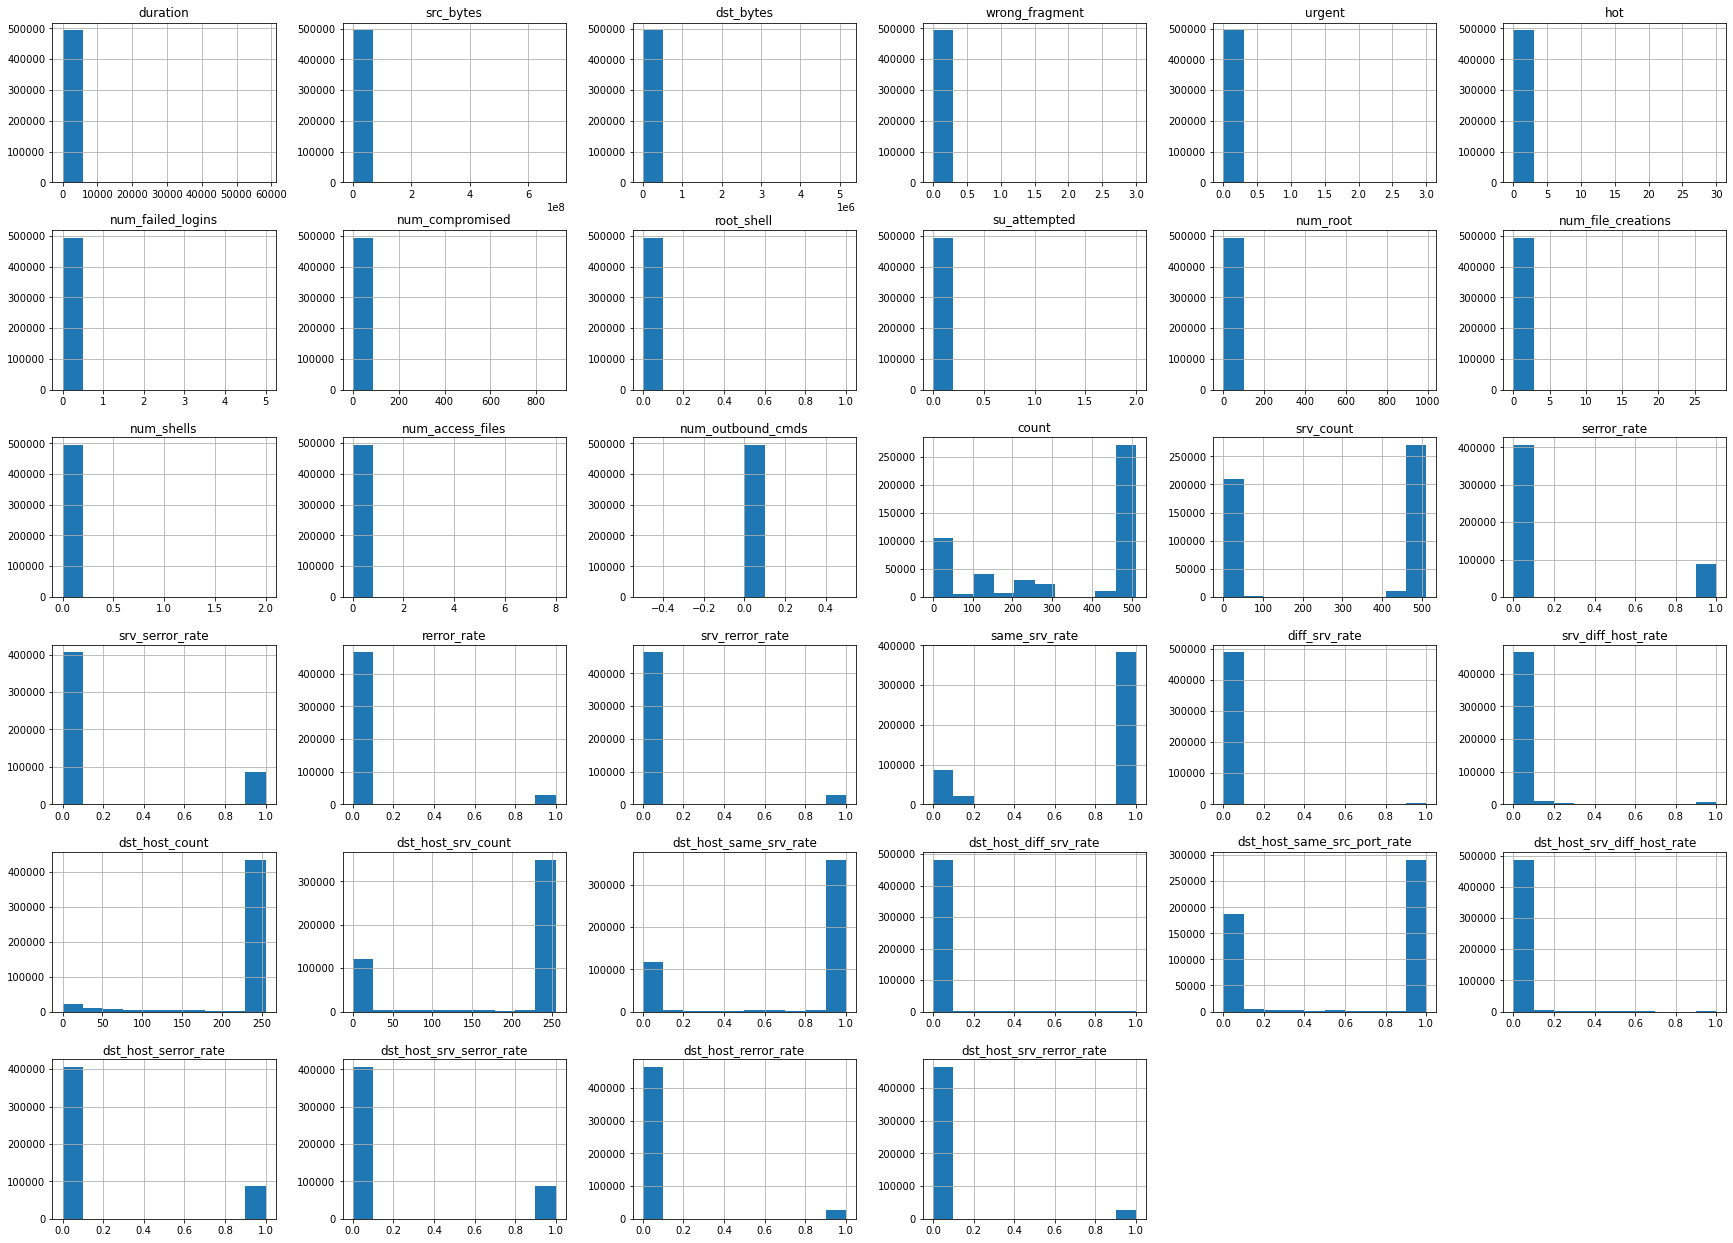

In [197]:
df[cont_cols].hist(figsize=(30,22))

### 3. Data Normalization

As seen from the above continous variables distribution in the section 2.6 the scale of some of the features (columns) values are not in same range as others.
Hence the features need to be normalized so that the optimization during model training will happen in a better way and the model will not be sensitive to the features.

In [198]:
from sklearn import preprocessing # using sklearn library preprocessing function

In [200]:
df[cont_cols] = preprocessing.normalize(df[cont_cols],axis=0) # axis has to be set to 0 to perform column wise normalization

In [202]:
df[cont_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
duration,494020.0,0.000096,0.001419,0.0,0.000000e+00,0.000000e+00,0.000000,0.116987
src_bytes,494020.0,0.000004,0.001423,0.0,6.478663e-08,7.486455e-07,0.000001,0.998255
dst_bytes,494020.0,0.000037,0.001422,0.0,0.000000e+00,0.000000e+00,0.000000,0.221925
wrong_fragment,494020.0,0.000068,0.001421,0.0,0.000000e+00,0.000000e+00,0.000000,0.031626
urgent,494020.0,0.000004,0.001423,0.0,0.000000e+00,0.000000e+00,0.000000,0.774597
hot,494020.0,0.000063,0.001421,0.0,0.000000e+00,0.000000e+00,0.000000,0.054521
num_failed_logins,494020.0,0.000014,0.001423,0.0,0.000000e+00,0.000000e+00,0.000000,0.458349
num_compromised,494020.0,0.000008,0.001423,0.0,0.000000e+00,0.000000e+00,0.000000,0.699366
root_shell,494020.0,0.000015,0.001423,0.0,0.000000e+00,0.000000e+00,0.000000,0.134840
su_attempted,494020.0,0.000007,0.001423,0.0,0.000000e+00,0.000000e+00,0.000000,0.365148


array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'src_bytes'}>,
        <AxesSubplot:title={'center':'dst_bytes'}>,
        <AxesSubplot:title={'center':'wrong_fragment'}>,
        <AxesSubplot:title={'center':'urgent'}>,
        <AxesSubplot:title={'center':'hot'}>],
       [<AxesSubplot:title={'center':'num_failed_logins'}>,
        <AxesSubplot:title={'center':'num_compromised'}>,
        <AxesSubplot:title={'center':'root_shell'}>,
        <AxesSubplot:title={'center':'su_attempted'}>,
        <AxesSubplot:title={'center':'num_root'}>,
        <AxesSubplot:title={'center':'num_file_creations'}>],
       [<AxesSubplot:title={'center':'num_shells'}>,
        <AxesSubplot:title={'center':'num_access_files'}>,
        <AxesSubplot:title={'center':'num_outbound_cmds'}>,
        <AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'srv_count'}>,
        <AxesSubplot:title={'center':'serror_rate'}>],
       [<AxesSubplot:title

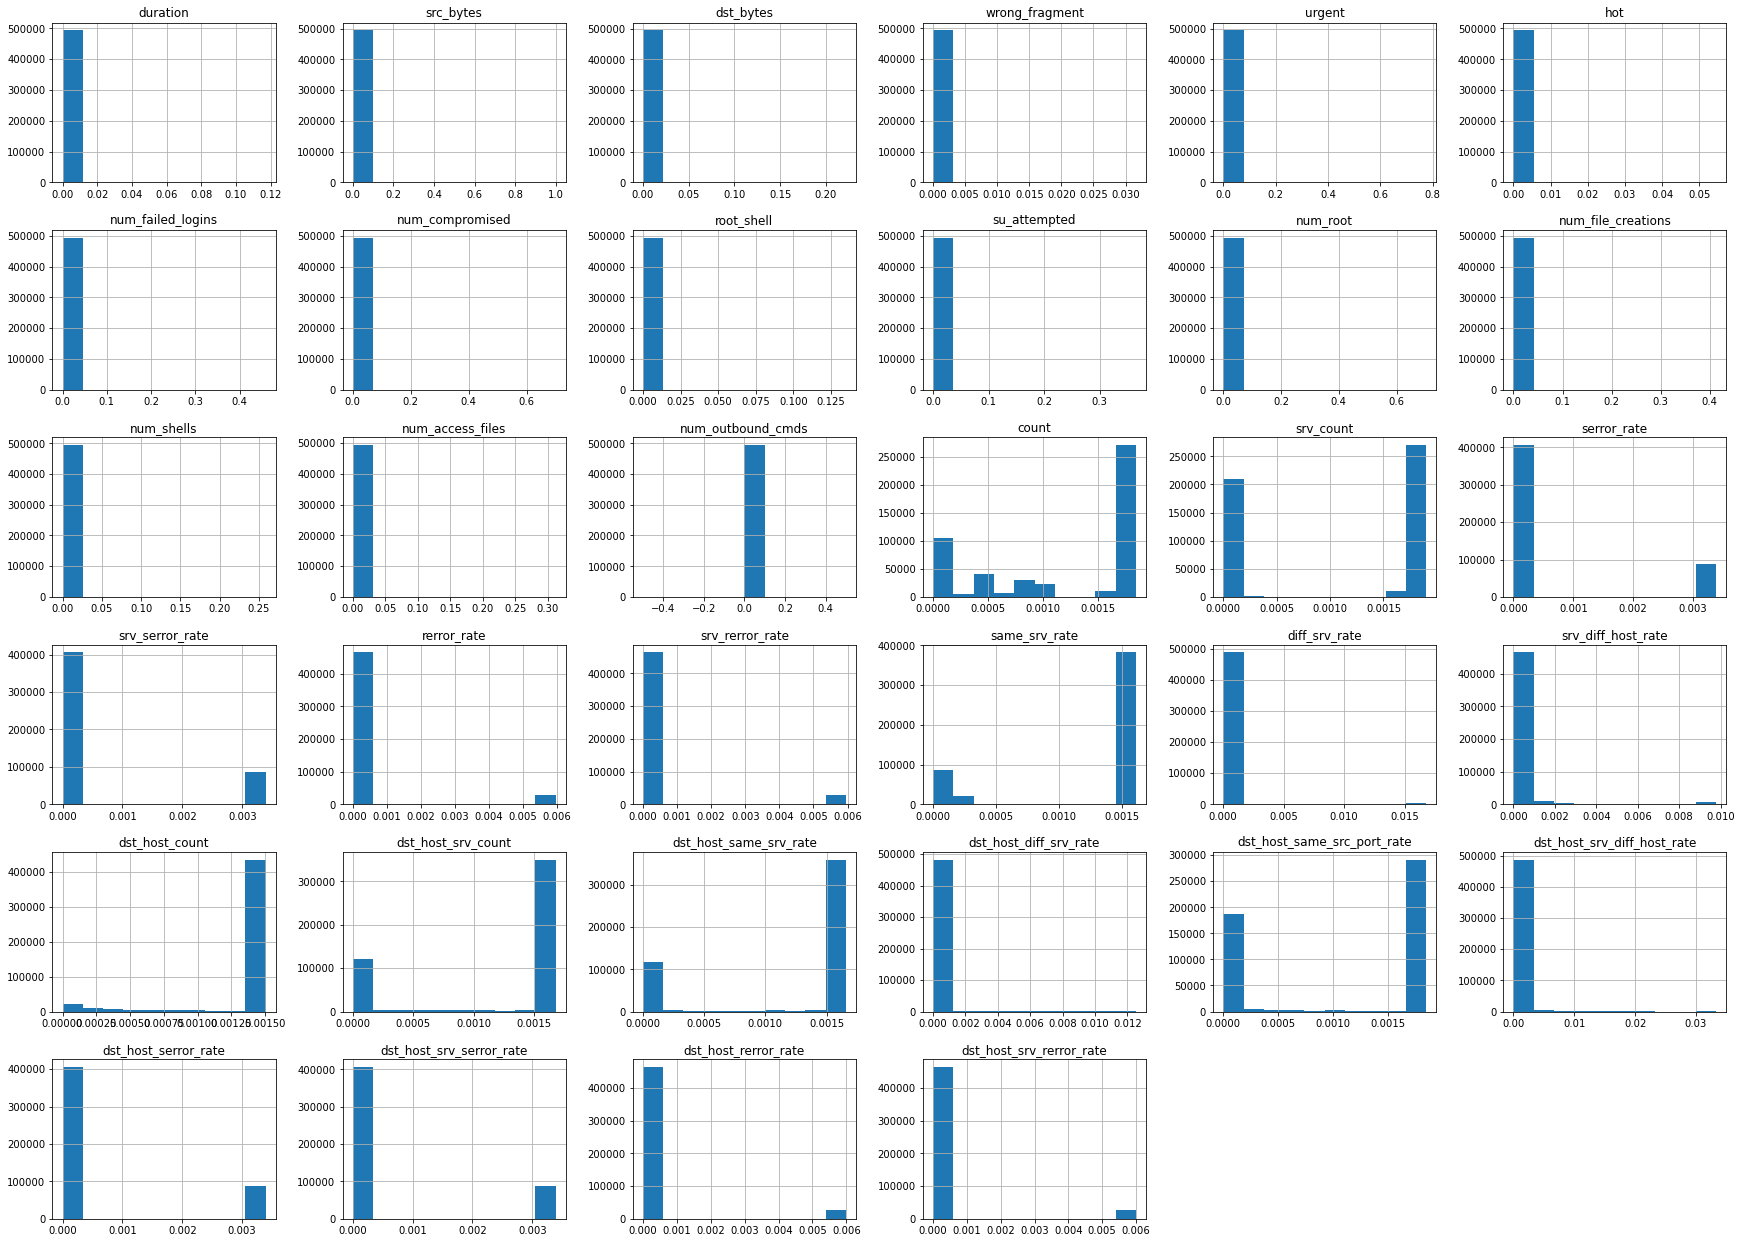

In [204]:
df[cont_cols].hist(figsize=(30,22)) # all values are between 0 and 1 with unit norm

In [205]:
df.sample(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
16089,0.0,tcp,http,SF,4.477476e-07,0.000029,0,0.0,0.0,0.0,...,0.001256,0.001657,0.000000,0.000037,0.002668,0.0,0.000034,0.000000,0.000000,normal
464869,0.0,tcp,private,REJ,0.000000e+00,0.000000,0,0.0,0.0,0.0,...,0.000026,0.000033,0.000877,0.000000,0.000000,0.0,0.000000,0.005983,0.005998,abnormal
